###  Topic Modeling Using NewsAPI and LDA!

### Write Python scripts to download Tweets for any Twitter account OR News using any News API. Then, on the downloaded tweets, Apply the following:

1.	Cleaning of the tweets or News
2.	Apply LDA for topic modeling; you can run LDA for 10-15 topics.
3.	Based on the Topic\term strength, you need to create a word cloud
4.	When a word is clicked, then it should display the related tweets for that word.


In [2]:
!pip install requests pandas nltk scikit-learn matplotlib wordcloud pyLDAvis


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


# Imports

In [3]:
# necessary imports of libraries
import requests
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
# import pyLDAvis.sklearn
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#from dash import Dash, dcc, html, Input, Output
import base64
from io import BytesIO

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandippoudel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Fetch News using news API

In [4]:
# fetching 8 news using newsapi on technology, medical, education, environment, science, sports, travel, food, history, psychology
def fetch_news(api_key, query, language='en', page_size=8):
    url = 'https://newsapi.org/v2/everything'
    params = {
        'q': query,
        'language': language,
        'pageSize': page_size,
        'apiKey': api_key,
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data['articles'])
    else:
        print(f"Error: {response.status_code} - {response.json()['message']}")
        return pd.DataFrame()

### Here We used NewsAPI to extract news different Topic wise

In [5]:
topics = ["technology", "medical", "education", "environment", "science", "sports", "travel", "food", "history", "psychology"]
raw_news = []
for each in topics:
    each_topic_news = fetch_news("5a9b2c4e4eb142739dca8203602d26c0", each)
    each_topic_news["topic"] = each
    raw_news.append(each_topic_news)
raw_news

[                                        source         author  \
 0             {'id': 'wired', 'name': 'Wired'}    Steven Levy   
 1             {'id': 'wired', 'name': 'Wired'}    Will Knight   
 2             {'id': 'wired', 'name': 'Wired'}  David Gilbert   
 3  {'id': None, 'name': 'Yahoo Entertainment'}  Lawrence Bonk   
 4     {'id': 'the-verge', 'name': 'The Verge'}      Emma Roth   
 5            {'id': None, 'name': 'ReadWrite'}   Graeme Hanna   
 6          {'id': None, 'name': 'Gizmodo.com'}     Matt Novak   
 7          {'id': None, 'name': 'Gizmodo.com'}      Kyle Barr   
 
                                                title  \
 0  Don’t Let Mistrust of Tech Companies Blind You...   
 1    OpenAI Offers a Peek Inside the Guts of ChatGPT   
 2                         Neo-Nazis Are All-In On AI   
 3  Nokia just made the first phone call using 3D ...   
 4             Elon Musk drops lawsuit against OpenAI   
 5  ‘Robot pill’ technology reaches clinical trial...   
 6  A

In [6]:
# concatenate all DataFrames into one
raw_data = pd.concat(raw_news, ignore_index=True)
raw_data

,source,author,title,description,url,urlToImage,publishedAt,content,topic
0,"{'id': 'wired', 'name': 'Wired'}",Steven Levy,Don’t Let Mistrust of Tech Companies Blind You...,It’s OK to be doubtful of tech leaders’ grandi...,https://www.wired.com/story/dont-let-mistrust-...,https://media.wired.com/photos/66625436bd6c904...,2024-06-07T13:00:00Z,It seems evident to me that almost 70 years af...,technology
1,"{'id': 'wired', 'name': 'Wired'}",Will Knight,OpenAI Offers a Peek Inside the Guts of ChatGPT,Days after former employees said the company w...,https://www.wired.com/story/openai-offers-a-pe...,https://media.wired.com/photos/6661d484e7f0257...,2024-06-06T17:45:55Z,ChatGPT developer OpenAIs approach to building...,technology
2,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,Neo-Nazis Are All-In On AI,Extremists are developing their own hateful AI...,https://www.wired.com/story/neo-nazis-are-all-...,https://media.wired.com/photos/667211650f046d6...,2024-06-20T09:00:00Z,Extremists across the US have weaponized artif...,technology
3,"{'id': None, 'name': 'Yahoo Entertainment'}",Lawrence Bonk,Nokia just made the first phone call using 3D ...,Nokia just announced that it has made the firs...,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-06-10T16:50:43Z,"If you click 'Accept all', we and our partners...",technology
4,"{'id': 'the-verge', 'name': 'The Verge'}",Emma Roth,Elon Musk drops lawsuit against OpenAI,Elon Musk was suing ChatGPT maker OpenAI and i...,https://www.theverge.com/2024/6/11/24176462/el...,https://cdn.vox-cdn.com/thumbor/qhhAPf5iS_vHpw...,2024-06-11T21:29:42Z,Elon Musk drops lawsuit against OpenAI\r\nElon...,technology
...,...,...,...,...,...,...,...,...,...
75,"{'id': None, 'name': 'Science Daily'}",None,New study challenges 'pop psychology' myths ab...,By ditching 'pop psychology myths' about habit...,https://www.sciencedaily.com/releases/2024/06/...,https://www.sciencedaily.com/images/scidaily-i...,2024-06-06T19:23:43Z,By ditching 'pop psychology myths' about habit...,psychology
76,"{'id': None, 'name': 'Johnhawks.net'}",John Hawks,"The ""blooming, buzzing confusion"" of William J...",I investigate the origin of a well-known quote...,https://johnhawks.net/weblog/the-blooming-buzz...,https://images.unsplash.com/photo-152449218889...,2024-06-12T17:56:20Z,I ran across a heavily used quote by William J...,psychology
77,"{'id': None, 'name': 'BBC News'}",None,Analysis: Where the Salford scrap leaves Starm...,Political editor Chris Mason reflects on a tet...,https://www.bbc.com/news/articles/cmjjzxg7k6no,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-06-05T03:43:24Z,"Chris Mason,Political editor, @ChrisMasonBBC\r...",psychology
78,"{'id': 'new-scientist', 'name': 'New Scientist'}",Chris Stokel-Walker,University examiners fail to spot ChatGPT answ...,ChatGPT-written exam submissions for a psychol...,https://www.newscientist.com/article/2436888-u...,https://images.newscientist.com/wp-content/upl...,2024-06-26T19:00:55Z,Exams taken in person make it harder for stude...,psychology


# 1. Data Preprocessing and Cleaning: Description of news

In [7]:
# remove url, mentions, hashtags, extra whitespace from description and converting the description into lower case
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#', '', text)        # remove hashtags
    text = re.sub(r'\s+', ' ', text)     # remove extra whitespace
    text = text.lower()                  # convert to lowercase
    return text

# remove stop words from description and save
def preprocess_data(df):
    df['cleaned_text'] = df['description'].apply(clean_text)
    stop_words = set(stopwords.words('english'))
    df['cleaned_text'] = df['cleaned_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in stop_words])
    )
    return df

In [8]:
preprocess_data = preprocess_data(raw_data)
preprocess_data

,source,author,title,description,url,urlToImage,publishedAt,content,topic,cleaned_text
0,"{'id': 'wired', 'name': 'Wired'}",Steven Levy,Don’t Let Mistrust of Tech Companies Blind You...,It’s OK to be doubtful of tech leaders’ grandi...,https://www.wired.com/story/dont-let-mistrust-...,https://media.wired.com/photos/66625436bd6c904...,2024-06-07T13:00:00Z,It seems evident to me that almost 70 years af...,technology,it’s ok doubtful tech leaders’ grandiose visio...
1,"{'id': 'wired', 'name': 'Wired'}",Will Knight,OpenAI Offers a Peek Inside the Guts of ChatGPT,Days after former employees said the company w...,https://www.wired.com/story/openai-offers-a-pe...,https://media.wired.com/photos/6661d484e7f0257...,2024-06-06T17:45:55Z,ChatGPT developer OpenAIs approach to building...,technology,days former employees said company reckless te...
2,"{'id': 'wired', 'name': 'Wired'}",David Gilbert,Neo-Nazis Are All-In On AI,Extremists are developing their own hateful AI...,https://www.wired.com/story/neo-nazis-are-all-...,https://media.wired.com/photos/667211650f046d6...,2024-06-20T09:00:00Z,Extremists across the US have weaponized artif...,technology,extremists developing hateful ais supercharge ...
3,"{'id': None, 'name': 'Yahoo Entertainment'}",Lawrence Bonk,Nokia just made the first phone call using 3D ...,Nokia just announced that it has made the firs...,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-06-10T16:50:43Z,"If you click 'Accept all', we and our partners...",technology,nokia announced made first-ever audio video ca...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Emma Roth,Elon Musk drops lawsuit against OpenAI,Elon Musk was suing ChatGPT maker OpenAI and i...,https://www.theverge.com/2024/6/11/24176462/el...,https://cdn.vox-cdn.com/thumbor/qhhAPf5iS_vHpw...,2024-06-11T21:29:42Z,Elon Musk drops lawsuit against OpenAI\r\nElon...,technology,"elon musk suing chatgpt maker openai ceo, sam ..."
...,...,...,...,...,...,...,...,...,...,...
75,"{'id': None, 'name': 'Science Daily'}",None,New study challenges 'pop psychology' myths ab...,By ditching 'pop psychology myths' about habit...,https://www.sciencedaily.com/releases/2024/06/...,https://www.sciencedaily.com/images/scidaily-i...,2024-06-06T19:23:43Z,By ditching 'pop psychology myths' about habit...,psychology,"ditching 'pop psychology myths' habits, better..."
76,"{'id': None, 'name': 'Johnhawks.net'}",John Hawks,"The ""blooming, buzzing confusion"" of William J...",I investigate the origin of a well-known quote...,https://johnhawks.net/weblog/the-blooming-buzz...,https://images.unsplash.com/photo-152449218889...,2024-06-12T17:56:20Z,I ran across a heavily used quote by William J...,psychology,investigate origin well-known quote william ja...
77,"{'id': None, 'name': 'BBC News'}",None,Analysis: Where the Salford scrap leaves Starm...,Political editor Chris Mason reflects on a tet...,https://www.bbc.com/news/articles/cmjjzxg7k6no,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-06-05T03:43:24Z,"Chris Mason,Political editor, @ChrisMasonBBC\r...",psychology,political editor chris mason reflects tetchy s...
78,"{'id': 'new-scientist', 'name': 'New Scientist'}",Chris Stokel-Walker,University examiners fail to spot ChatGPT answ...,ChatGPT-written exam submissions for a psychol...,https://www.newscientist.com/article/2436888-u...,https://images.newscientist.com/wp-content/upl...,2024-06-26T19:00:55Z,Exams taken in person make it harder for stude...,psychology,chatgpt-written exam submissions psychology de...


In [9]:
preprocess_data['description'][0], preprocess_data['cleaned_text'][0]



('It’s OK to be doubtful of tech leaders’ grandiose visions of our AI future—but that doesn’t mean the technology won’t have a huge impact.',
 'it’s ok doubtful tech leaders’ grandiose visions ai future—but doesn’t mean technology won’t huge impact.')

# 2. Perform Linear Discriminant Analysis

In [10]:
# perform lda on preprocessed data
def perform_lda(df, num_components=8):
    vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
    dtm = vectorizer.fit_transform(df['cleaned_text'])

    lda_model = LatentDirichletAllocation(n_components=num_components, random_state=42)
    lda_model.fit(dtm)

    return lda_model, dtm, vectorizer

# 3. Display words cloud on 10 topics

In [11]:
def display_word_cloud(lda_model, vectorizer, df, news_topic):
    # get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # extract topics and associated words
    topics_words = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
        topics_words[topic_idx] = topic_words

    # join all topic words into a single string
    text = ' '.join([word for topic_words in topics_words.values() for word in topic_words])

    # generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic: {news_topic}')
    plt.show()

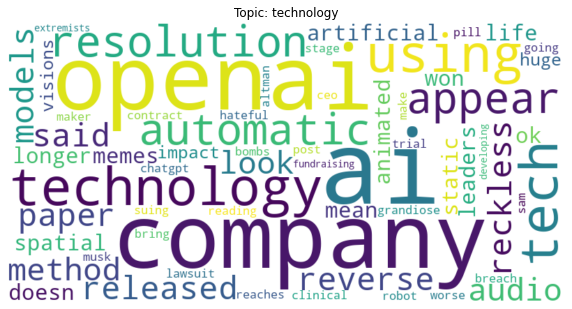

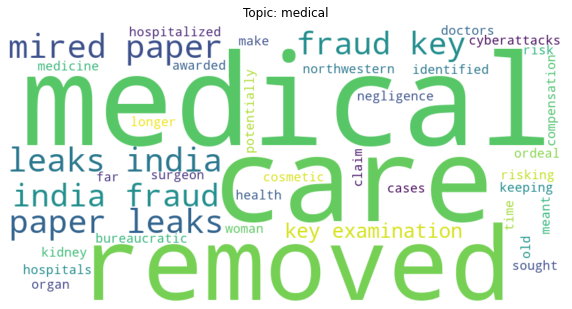

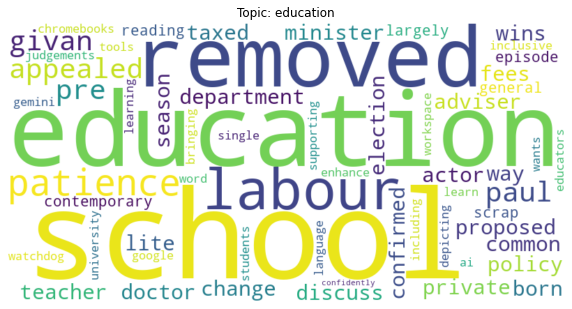

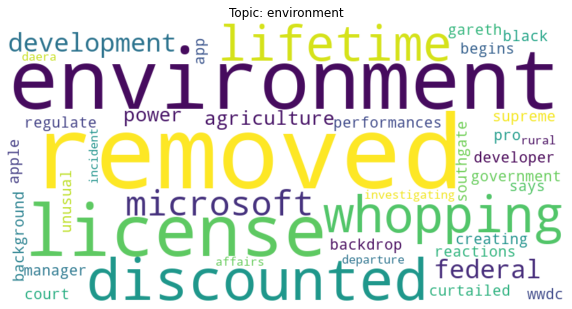

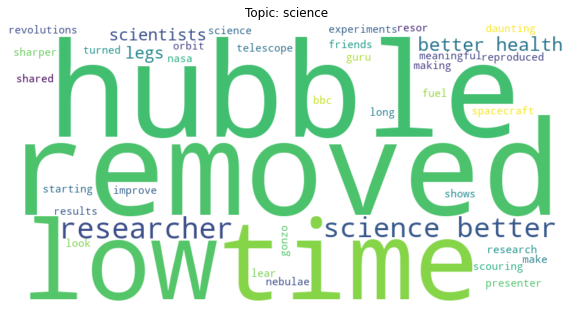

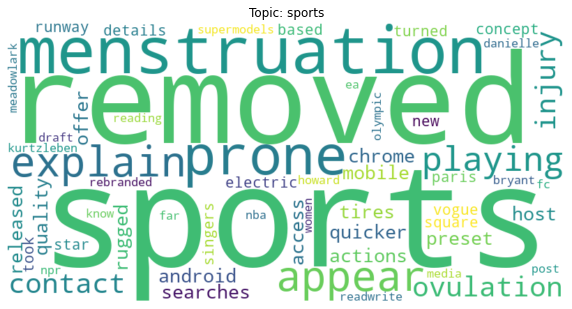

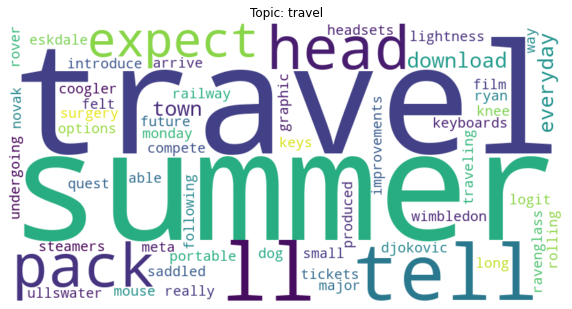

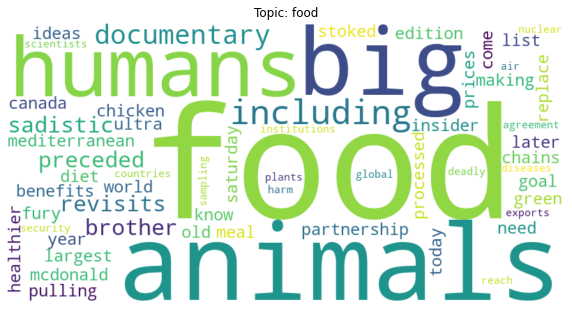

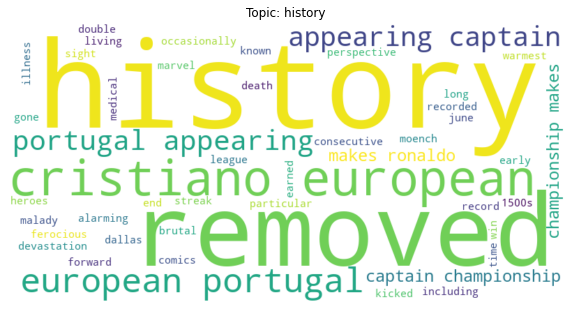

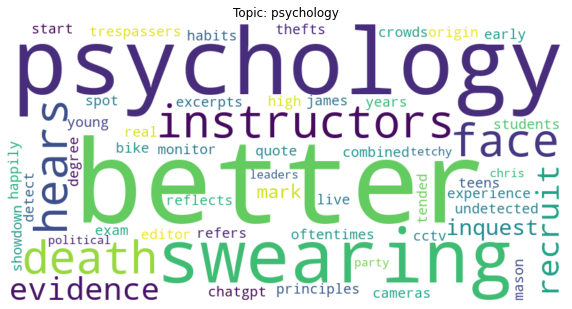

In [12]:
for each in topics:
    topic_wise_data = preprocess_data[preprocess_data['topic'] == each]
    lda_model, dtm, vectorizer = perform_lda(topic_wise_data, num_components=8)
    display_word_cloud(lda_model, vectorizer, topic_wise_data, news_topic = each)

#  

#  

# 4.	When a word is clicked, then it should display the related tweets for that word.

In [13]:
!pip install dash


  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.4 MB/s eta 0:00:0000:0100:01
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached werkzeug-3.0.3-py3-none-any.whl (227 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.1.2
    Uninstalling Werkzeug-2.1.2:
      Successfully uninstalled Werkzeug-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [14]:
#Import required libraries for dash framework, plotly for visuals
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO



In [16]:
# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Dropdown for selecting a topic
    dcc.Dropdown(
        id='topic-dropdown',
        options=[{'label': topic, 'value': topic} for topic in topics],
        value=topics[0]  # Default value for the dropdown
    ),
    # Div for displaying the word cloud
    html.Div(id='word-cloud'),
    # Div for displaying related articles
    html.Div(id='related-articles')
])

# Function to generate word cloud image from topic words
def generate_word_cloud_image(topic_words):
    # Join topic words into a single string
    text = ' '.join(topic_words)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Save word cloud to a BytesIO object
    img = BytesIO()
    wordcloud.to_image().save(img, format='PNG')
    img.seek(0)
    # Encode the image to base64
    return base64.b64encode(img.getvalue()).decode()

@app.callback(
    Output('word-cloud', 'children'),  # Output for word cloud div
    Output('related-articles', 'children'),  # Output for related articles div
    Input('topic-dropdown', 'value'),  # Input from topic dropdown
    Input('related-articles', 'n_clicks')  # Input for clicks on words
)
def update_word_cloud(selected_topic, n_clicks):
    # Filter data for the selected topic
    topic_wise_data = preprocess_data[preprocess_data['topic'] == selected_topic]
    # Perform LDA on the filtered data
    lda_model, dtm, vectorizer = perform_lda(topic_wise_data, num_components=8)
    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()
    topics_words = {}
    # Extract words for each topic
    for topic_idx, topic in enumerate(lda_model.components_):
        topics_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]

    # Generate word cloud image for the first topic
    word_cloud_image = generate_word_cloud_image(topics_words[0])

    # Prepare related articles for the first topic
    related_articles = []
    for word in topics_words[0]:
        related_articles.append(html.Div([
            html.H4(word, id=f'word-{word}'),  # Display word as heading
            html.Ul([html.Li(article) for article in topic_wise_data[topic_wise_data['cleaned_text'].str.contains(word)]['description']])  # List related articles
        ]))

    return html.Img(src=f'data:image/png;base64,{word_cloud_image}', style={'width': '100%'}), related_articles

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

#  

#  